In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import pandas as pd

In [2]:
from spec_analysis import spec_ly_lib,spec_heii_lib,spec_civ_lib \
,fitted_ly,fitted_heii,fitted_civ \
,v_ly,v_heii,v_civ,ly_noise,heii_noise,civ_noise

/usr/local/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/usr/local/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/usr/local/lib/python3.7/site-packages/spectral_cube/_moments.py:179: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/KCWI_script/Map.py:78: RuntimeWarning: invalid value encountered in greater
  lydispersionmap[lydispersionmap>1000]=np.nan
/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/KCWI_script/Map.py:79: RuntimeWarning: invalid value encountered in less
  lydispersionmap[lydispersionmap<200]=np.nan
/usr/local/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/usr/local/lib/python3.7/sit

In [14]:
def img_plot(img,snr,x_window,y_window,level):

    fig,ax=plt.subplots(1,1)
    img=ax.imshow(img,cmap='coolwarm',vmax=800,vmin=-800)
    cbar=plt.colorbar(img,ax=ax)
    cbar.ax.set_ylabel(r'V [km s$^{-1}$]',fontsize=15.)

    for i in range(x_window.size):
        rect = patches.Rectangle((y_window[i]-10,x_window[i]-10),
                                 20,20,linewidth=1,edgecolor='black',facecolor='none')
        ax.add_patch(rect)
        ax.annotate(str(i),xy=(y_window[i]-10,x_window[i]+5),weight='bold',
                    color='black',fontsize=15)
    ax.contour(snr,levels=[level],colors='black',linewidths=2.)
    plt.rcParams['figure.figsize'] = [8,8]
    plt.axis('off')

def spec_plot(y_lib,x_lib,err_lib,fitlib,nx,ny,n,delta,ylim,text_coor):


    spec_1_plot=y_lib[0]
    spec_2_plot=y_lib[1]
    spec_3_plot=y_lib[2]
    yerr1=err_lib[0]
    yerr2=err_lib[1]
    yerr3=err_lib[2]

    
    fig,ax=plt.subplots(nx,ny,sharex=True,sharey='row')
    for i in range(0,nx,n):
        for j in range(ny):
            ax[i,j].errorbar(x_lib[0],y_lib[0][((i+delta)//n)*ny+j],
                             yerr=err_lib[0]*np.ones_like(y_lib[0][(i//n)*ny+j]),
                             c='black',capsize=3.)
            ax[i,j].scatter(x_lib[0],y_lib[0][((i+delta)//n)*ny+j],c='black')
            ax[i,j].plot(x_lib[0],fitlib[0][((i+delta)//n)*ny+j],c='red',linewidth=4.)
            ax[i,j].vlines(0,ylim[0],ylim[1],color='dimgray',lw=5)
            ax[i,j].tick_params(axis='both', which='both',top=True,right=True)
            ax[i,j].minorticks_on()
            ax[i,j].set_ylim(ylim[0],ylim[1])
            ax[i,j].text(text_coor[0],text_coor[1],'window %d'%(((i+delta)//n)*ny+j),fontsize=15.)
            if ((i+delta)//n)*ny+j==28:
                break
        
    for i in range(1,nx,n):
        for j in range(ny):
            ax[i,j].errorbar(x_lib[1],y_lib[1][((i+delta)//n)*ny+j],
                             yerr=err_lib[1]*np.ones_like(y_lib[1][((i+delta)//n)*ny+j]),
                             capsize=3.,c='blue')
            ax[i,j].scatter(x_lib[1],y_lib[1][((i+delta)//n)*ny+j],c='blue')
            ax[i,j].plot(x_lib[1],fitlib[1][((i+delta)//n)*ny+j],c='red',linewidth=4.)
            ax[i,j].vlines(0,ylim[2],ylim[3],color='dimgray',lw=5)
            ax[i,j].tick_params(axis='both', which='both',top=True,right=True)
            ax[i,j].minorticks_on()
            ax[i,j].set_ylim(ylim[2],ylim[3])
            if ((i+delta)//n)*ny+j==28:
                break

        
    for i in range(2,nx,n):
        for j in range(ny):
            ax[i,j].errorbar(x_lib[2],y_lib[2][((i+delta)//n)*ny+j],
                             yerr=err_lib[2]*np.ones_like(y_lib[2][((i+delta)//n)*ny+j]),
                             capsize=3.,c='green')
            ax[i,j].scatter(x_lib[2],y_lib[2][((i+delta)//n)*ny+j],c='green')
            ax[i,j].plot(x_lib[2],fitlib[2][((i+delta)//n)*ny+j],c='red',linewidth=4.)
            ax[i,j].vlines(0,ylim[2],ylim[3],color='dimgray',lw=5)
            ax[i,j].tick_params(axis='both', which='both',top=True,right=True)
            ax[i,j].minorticks_on()
            ax[i,j].set_ylim(ylim[2],ylim[3])
            if ((i+delta)//n)*ny+j==28:
                break
    fig.text(0.08,0.7,r'F$_{\rm \lambda}$ [10$^{-19}$ erg s$^{-1}$ cm$^{-2}$ $\AA ^{-1}$]',
        rotation='vertical',fontsize=25)
    fig.text(0.5,0.05,r'V [km s$^{-1}$]',fontsize=25)
    return fig,ax

In [ ]:
v_img=v_lib[0]
v_img[snr_lib[0]<=7.]=0
img_plot(v_img,snr_lib[0],x_window_ly,y_window_ly,7.)
plt.show()
v_img=v_lib[2]
v_img[snr_lib[2]<=3.5]=0
img_plot(v_img,snr_lib[2],x_window_civ,y_window_civ,3.5)
plt.show()

In [4]:
spec_lib=[spec_ly_lib,spec_heii_lib,spec_civ_lib]
v_lib=[v_ly,v_heii,v_civ]
fit_lib=[fitted_ly,fitted_heii,fitted_civ]
err_lib=[ly_noise,heii_noise/2.,civ_noise/2.]

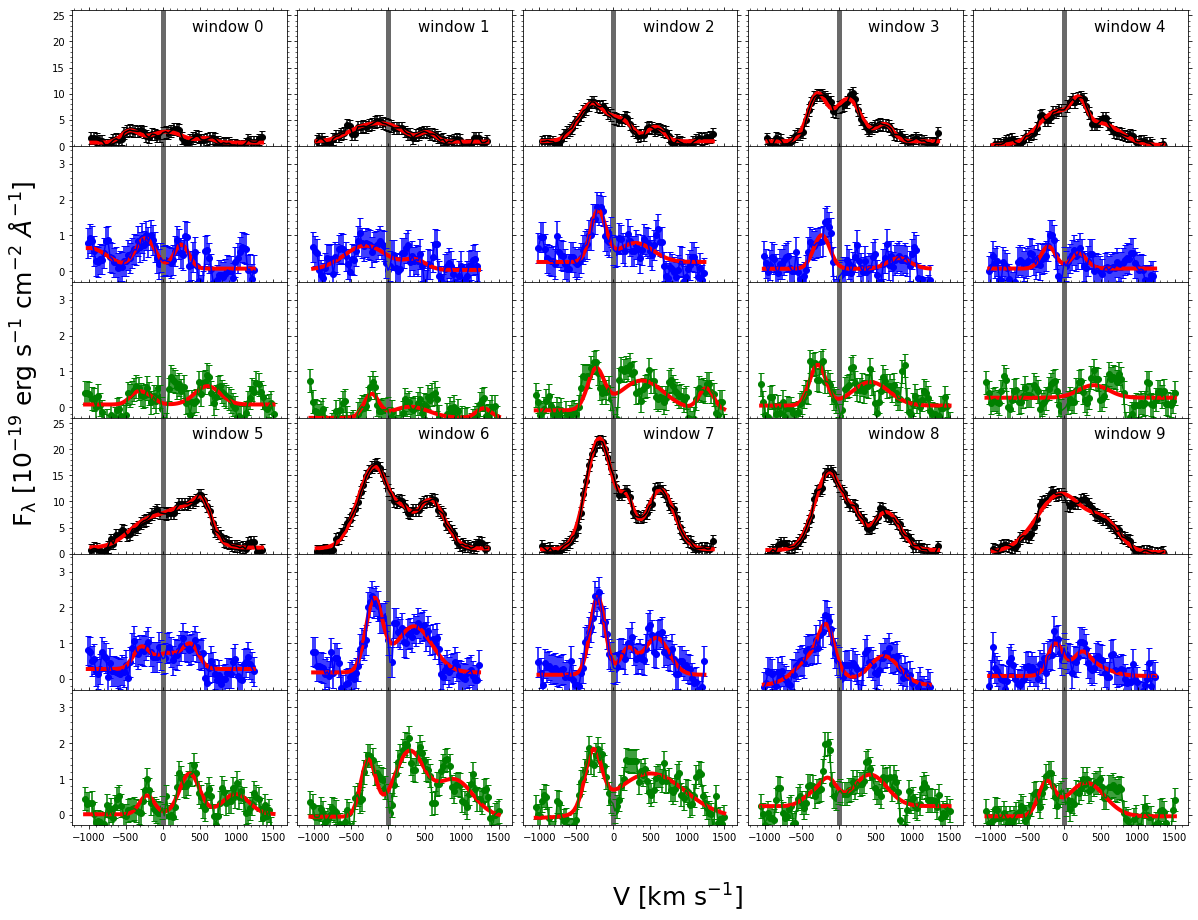

In [11]:
spec_plot(spec_lib,v_lib,err_lib,fit_lib,6,5,3,0,[0.,26.,-.3,3.5],[400,22.])
plt.rcParams['figure.figsize'] = [20,15]
plt.subplots_adjust(wspace=0.05,hspace=0.)
# plt.show()
savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/models/img/'
plt.savefig(savdic+'spec_map1.png',dpi=300)

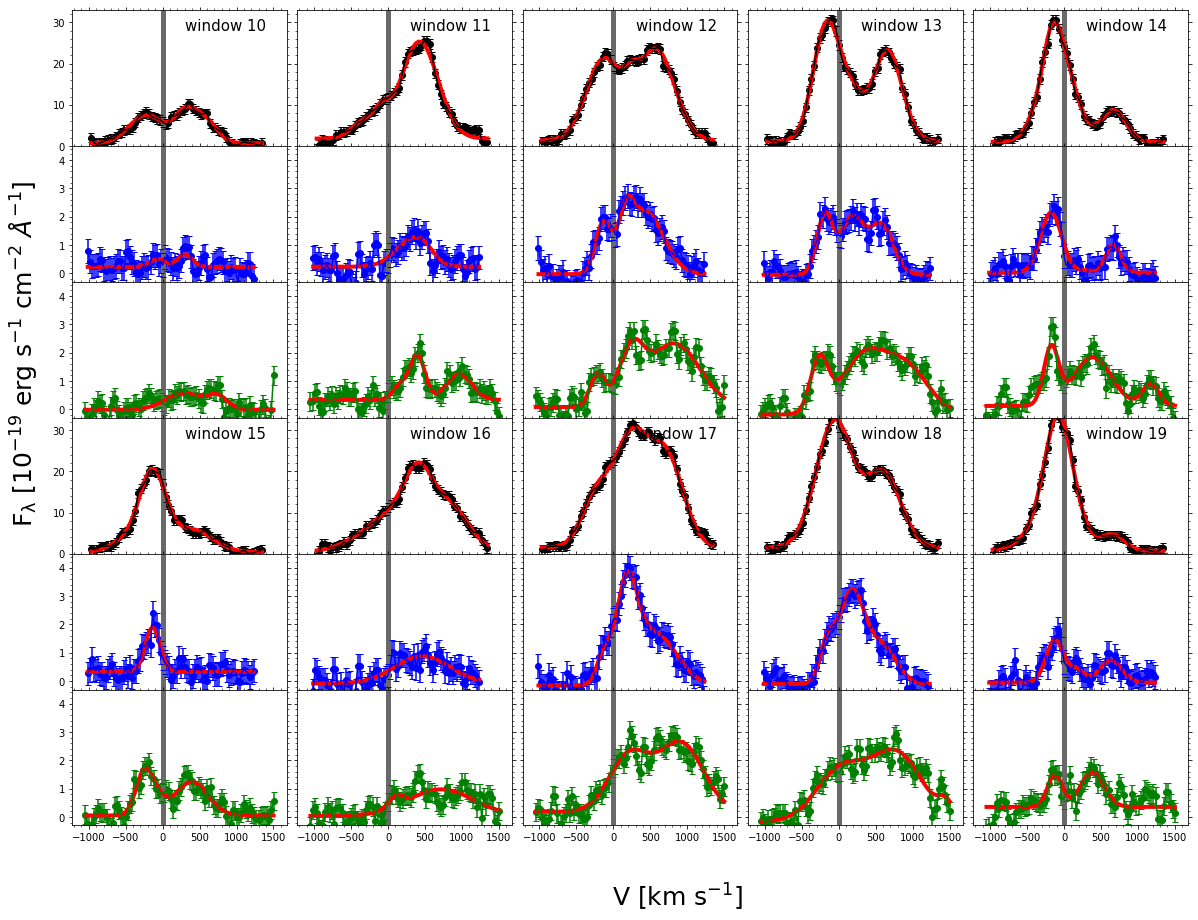

In [12]:
spec_plot(spec_lib,v_lib,err_lib,fit_lib,6,5,3,6,[0.,33.,-.3,4.5],[300,28.])
plt.rcParams['figure.figsize'] = [20,15]
plt.subplots_adjust(wspace=0.05,hspace=0.)
# plt.show()
savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/models/img/'
plt.savefig(savdic+'spec_map2.png',dpi=300)

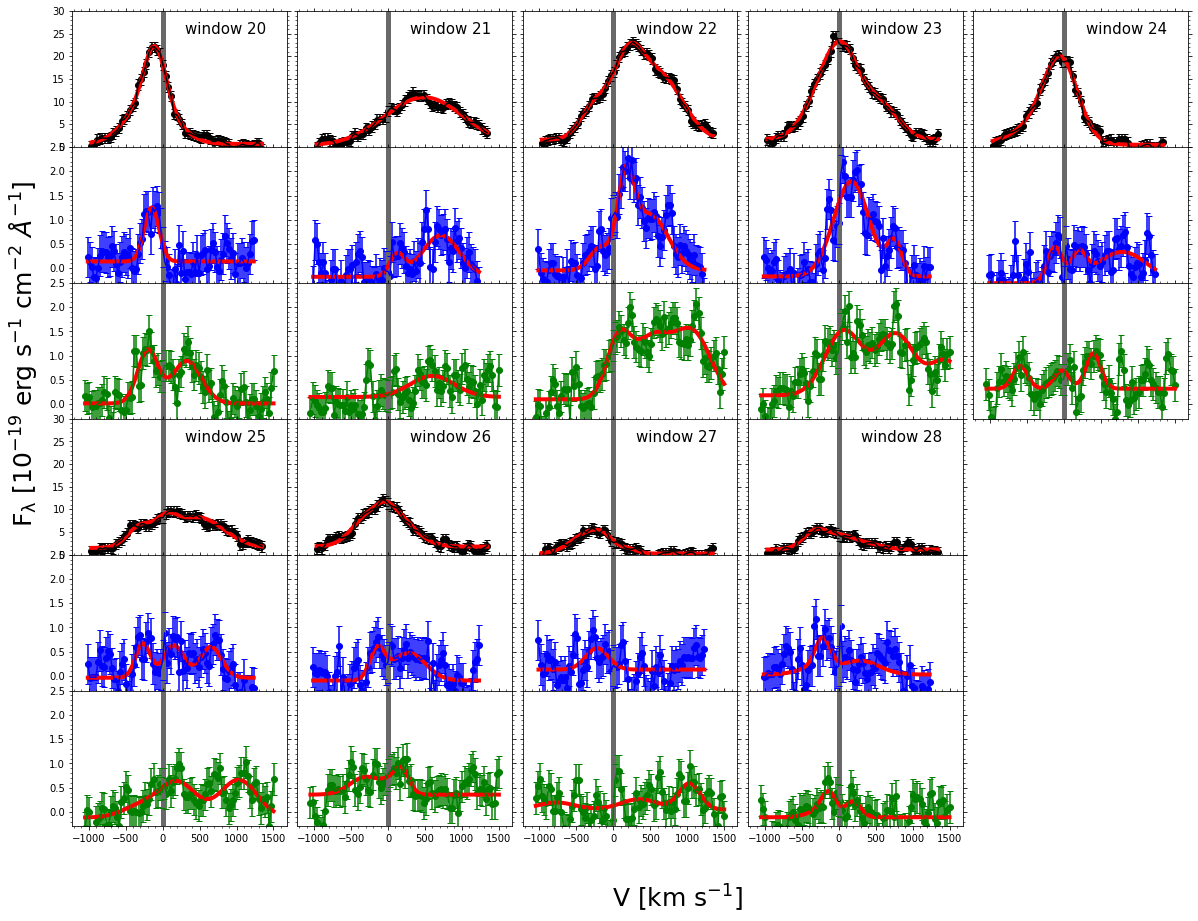

In [13]:
fig,ax=spec_plot(spec_lib,v_lib,err_lib,fit_lib,6,5,3,12,[0.,30.,-.3,2.5],[300,25.])
fig.delaxes(ax[-1,-1])
fig.delaxes(ax[-2,-1])
fig.delaxes(ax[-3,-1])
plt.rcParams['figure.figsize'] = [20,15]
plt.subplots_adjust(wspace=0.05,hspace=0.)
# plt.show()
savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/models/img/'
plt.savefig(savdic+'spec_map3.png',dpi=300)